# Домашнее задание "Случайные марковские процессы"

- Скачайте текст войны и мир (ссылка на [github](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [гугл диск](https://drive.google.com/drive/u/2/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU)). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
- [Выберите ряд](https://datamarket.com/data/list/?q=cat:fpg%20provider:tsdl) и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [1]:
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [2]:
# чтение файлов и папок
text = ''
for file in os.listdir():
    if 'tom' in file:
        tom_text = open(file, encoding='utf-8').read().lower()
        text += tom_text

In [3]:
text = re.sub('[^а-я\s]', '', text)

In [4]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя\n '
POS = {l: i for i, l in enumerate(RUSSIAN)}

In [5]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [6]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [7]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [8]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

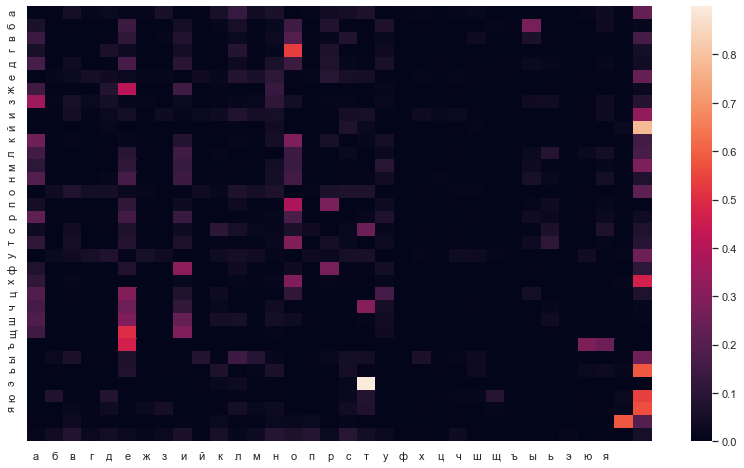

In [9]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [10]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
proba_sum = 0
most_proba = 0
for c in RUSSIAN:
    for f in RUSSIAN:
        proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[f]] * probabilities[POS[f], end]
        if proba > 0:
            print(''.join(['п', c, f, 'р']), proba)
            proba_sum += proba
        if proba > most_proba:
            most_proba = proba
            most_probable_word = ''.join(['п', c, f, 'р'])
print('вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р:', proba_sum)
print('самое вероятное слово из 4-х символов, которое начинается п, а кончается на р:', most_probable_word)

паар 7.4014983379565245e-09
пабр 1.0019982142566755e-06
павр 1.1413953328068425e-06
пагр 1.2690818330403032e-06
падр 2.9197336205623983e-06
паер 1.941852057376768e-06
пажр 7.30499932557018e-09
пазр 1.206927947173993e-06
паир 2.2579968652241466e-08
пайр 2.381148771960243e-08
пакр 4.80211892779221e-06
памр 1.0020746828931363e-07
панр 1.1142183375382267e-07
паор 8.775933452509992e-09
папр 5.4705258589668804e-06
парр 2.613331810554418e-08
паср 4.99698741968257e-07
патр 5.52203427550746e-06
паур 6.680980325256737e-08
пафр 3.161123811032144e-06
пахр 2.402364465995298e-07
пачр 2.5346925733700718e-08
пашр 5.259918526582122e-09
пащр 4.5451641687422465e-09
паэр 8.506706869140792e-11
паюр 1.5911344050316622e-07
паяр 1.3897258949215635e-07
па
р 7.054988853075404e-08
па р 8.562369278757946e-06
пгар 2.7173269358693285e-08
пгвр 4.3307874719173193e-10
пггр 5.4016396945030564e-11
пгдр 5.122255072704546e-08
пгер 3.335735450731763e-08
пгжр 2.2049766435064348e-13
пгзр 1.075216448314111e-11
пгир 4.43710618

# Генерирование выборок из марковской цепи

Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

In [11]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бкобра н 


### Выберите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [12]:
from hmmlearn.hmm import GaussianHMM

In [13]:
series = pd.read_csv("../Series/monthly-boston-armed-robberies-j.csv")["Count"]

In [14]:
values = series.values.reshape(-1,1)

In [15]:
for n in range(1, 16):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -739.512376545524
2 -652.7824661820221
3 -629.4670322744706
4 -593.9630465273627
5 -577.8593153999474
6 -571.3182247583837
7 -561.1297217988863
8 -557.2521338484632


Fitting a model with 119 free scalar parameters with only 118 data points will result in a degenerate solution.
Fitting a model with 142 free scalar parameters with only 118 data points will result in a degenerate solution.


9 -555.6785307556588
10 -553.3484367606726


Fitting a model with 167 free scalar parameters with only 118 data points will result in a degenerate solution.
Fitting a model with 194 free scalar parameters with only 118 data points will result in a degenerate solution.


11 -549.7631145345342
12 -541.5550922190058


Fitting a model with 223 free scalar parameters with only 118 data points will result in a degenerate solution.
Fitting a model with 254 free scalar parameters with only 118 data points will result in a degenerate solution.


13 -535.818993091213
14 -530.8729514893687
15 -526.270663797915


Fitting a model with 223 free scalar parameters with only 118 data points will result in a degenerate solution.


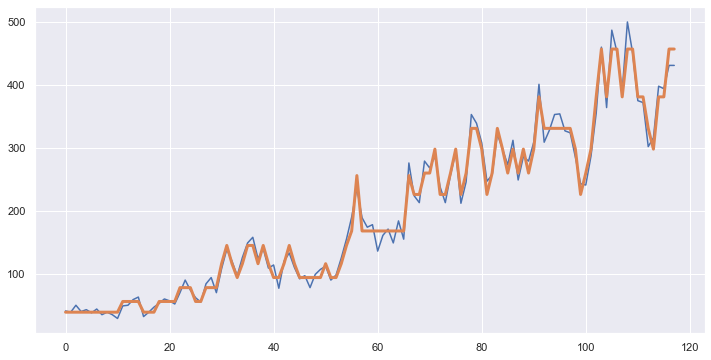

In [16]:
model = GaussianHMM(n_components=14,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [17]:
model.transmat_.shape

(14, 14)